In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

df.info()

<ipython-input-2-40dadfa25f1f>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Sold-To               397045 non-null  float64
 1   Party                 397045 non-null  object 
 2   Sales Organization    397045 non-null  object 
 3   Distribution Channel  397045 non-null  object 
 4   Division              397045 non-null  object 
 5   Material              397045 non-null  object 
 6   Material name         397045 non-null  object 
 7   Date                  397045 non-null  object 
 8   Orders                397045 non-null  object 
 9   Orders.1              397045 non-null  object 
 10  Sales                 397045 non-null  object 
 11  Sales.1               397045 non-null  object 
 12  Cred.Memos            397045 non-null  object 
 13  Cred.Memos.1          397045 non-null  object 
 14  Bill. Qty             397045 non-null  object 
 15

In [ ]:
df['Material'].unique()

array(['CNBM0150BUT01PR', 'MAFD0120LIM01PR', 'CNMS0100VAN01PR',
       'CNBM0200BUT01TR', 'CNLS0180MAG01TR', 'CNLS0200PLN01TR',
       'CNLS0200STR01TR', 'CNMS0100CHO01PR', 'CNMS0180STR01TS',
       'CNMS0100STR01PR', 'CNMS0180VAN01TS', 'MAFD0120ORG01PR',
       'MAFD0140MAG01PR', 'MAFD0160MAG01PR', 'MAFD0600MAG01PR',
       'CNMS0180BAN01TR', 'CNBM0200BUT02TR', 'CNMS0180BSH01TR',
       'CNMS0180CHO01TR', 'CNMS0180CHO01TS', 'CNMS0180COF01TR',
       'CNMS0180STR01TR', 'CNMS0180VAN01TR', 'MAFD1200MAG01PR',
       'MAFD2000MAG01PR', 'CNMS0500CHO01TR', 'CNMS0500STR01TR',
       'CNMS0500VAN01TR', 'MAFD0120APP01PR', 'MAFD0120MAG01PR',
       'MAFD0160APP02TR', 'MAFD0160MAG01TR', 'MAFD0160GUA01TS',
       'MAFD0160LCH01TR', 'MAFD0160MAG02TR', 'MAFD0200APP02TR',
       'MAFD0200MAG01TR', 'MAFD0200MAG02TR', 'CNMS0180MAG01TR',
       'CNMS0500BSH01TR', 'CNUH0500TON01PR', 'MAFD0160LIM01PR',
       'MAFD0160ORG01PR', 'MAFD0200APP01TR', 'MAFD0140APP01PR',
       'CNMS1000BSH02TR', 'CNMS1000CHO02

In [ ]:
new_df = df[df['Material'] == 'MAFD0120LIM01PR']
new_df = new_df[new_df['Year'] == '2019-20']
new_df = new_df[['Material', 'Date', 'Orders']].copy()
print(new_df)

               Material        Date     Orders
5       MAFD0120LIM01PR   4/25/2019     709.22
172     MAFD0120LIM01PR    4/2/2019    8604.77
173     MAFD0120LIM01PR    4/3/2019        0.0
174     MAFD0120LIM01PR   4/24/2019    3441.89
184     MAFD0120LIM01PR   4/25/2019    1063.84
...                 ...         ...        ...
289388  MAFD0120LIM01PR  17.03.2020   5,319.19
289532  MAFD0120LIM01PR  18.03.2020  10,325.71
291735  MAFD0120LIM01PR  23.03.2020   2,409.35
291947  MAFD0120LIM01PR  23.03.2020   1,773.08
291965  MAFD0120LIM01PR  23.03.2020   5,162.82

[1508 rows x 3 columns]


In [ ]:
new_df['Date'] = new_df['Date'].astype('datetime64[ns]')

In [ ]:
new_df=new_df.sort_values(by='Date')

In [ ]:
# Split the series to predict the last 3 months of 2017
new_df = new_df.set_index('Date')
new_df = new_df.loc[:'2019-12-31']
new_df = new_df.reset_index()
print(new_df)

           Date         Material    Orders
0    2019-04-01  MAFD0120LIM01PR    2836.9
1    2019-04-01  MAFD0120LIM01PR   1773.06
2    2019-04-01  MAFD0120LIM01PR   8604.77
3    2019-04-01  MAFD0120LIM01PR  34419.04
4    2019-04-01  MAFD0120LIM01PR   1720.96
...         ...              ...       ...
1093 2019-12-31  MAFD0120LIM01PR         0
1094 2019-12-31  MAFD0120LIM01PR    709.22
1095 2019-12-31  MAFD0120LIM01PR   1720.96
1096 2019-12-31  MAFD0120LIM01PR       0.0
1097 2019-12-31  MAFD0120LIM01PR         0

[1098 rows x 3 columns]


In [ ]:
new_df['Orders'] = new_df['Orders'].astype(float)
new_df.loc[new_df['Orders'] < 0, 'Orders'] = -1*new_df['Orders']
new_df
#try replacing it with mod value

,Date,Material,Orders
0,2019-04-01,MAFD0120LIM01PR,2836.90
1,2019-04-01,MAFD0120LIM01PR,1773.06
2,2019-04-01,MAFD0120LIM01PR,8604.77
3,2019-04-01,MAFD0120LIM01PR,34419.04
4,2019-04-01,MAFD0120LIM01PR,1720.96
...,...,...,...
1093,2019-12-31,MAFD0120LIM01PR,0.00
1094,2019-12-31,MAFD0120LIM01PR,709.22
1095,2019-12-31,MAFD0120LIM01PR,1720.96
1096,2019-12-31,MAFD0120LIM01PR,0.00


In [ ]:
import numpy as np
new_df['year'] = new_df['Date'].dt.year
new_df['month'] = new_df['Date'].dt.month
new_df['date'] = new_df['Date'].dt.day
new_df['weekday'] = new_df['Date'].dt.weekday
new_df['weekday'] = np.where(new_df.weekday == 0, 7, new_df.weekday)

new_df=new_df.sort_values(by='Date')
new_df

,Date,Material,Orders,year,month,date,weekday
0,2019-04-01,MAFD0120LIM01PR,2836.90,2019,4,1,7
20,2019-04-01,MAFD0120LIM01PR,1720.96,2019,4,1,7
19,2019-04-01,MAFD0120LIM01PR,17209.51,2019,4,1,7
18,2019-04-01,MAFD0120LIM01PR,1063.84,2019,4,1,7
17,2019-04-01,MAFD0120LIM01PR,103257.11,2019,4,1,7
...,...,...,...,...,...,...,...
1090,2019-12-31,MAFD0120LIM01PR,7092.25,2019,12,31,1
1089,2019-12-31,MAFD0120LIM01PR,0.00,2019,12,31,1
1088,2019-12-31,MAFD0120LIM01PR,3546.12,2019,12,31,1
1091,2019-12-31,MAFD0120LIM01PR,709.22,2019,12,31,1


In [ ]:
df_plot = new_df.set_index('Date')
df_plot = df_plot.loc[:'2019-09-30']

SHOWING TRENDS FOR SALES TILL SEPTEMBER

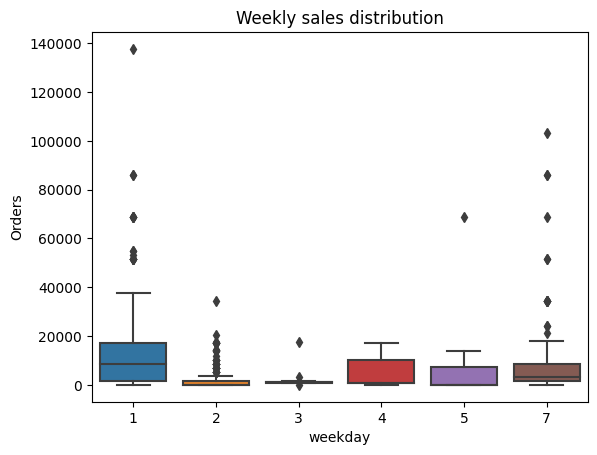

In [ ]:
import seaborn as sn
plot = sn.boxplot(x='weekday', y='Orders', data=df_plot)
_ = plot.set(title='Weekly sales distribution')

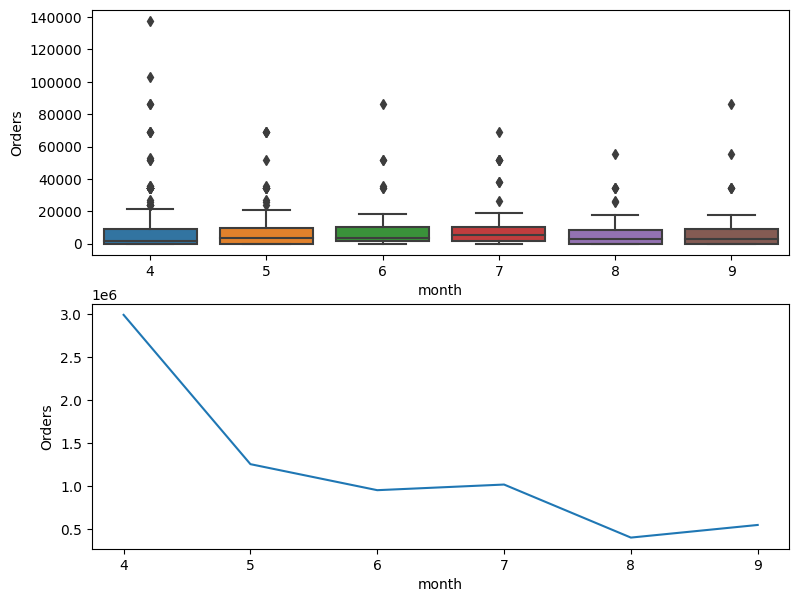

In [ ]:
from matplotlib import pyplot as plt
monthly_agg = df_plot.groupby('month')['Orders'].sum().reset_index()
fig, axs = plt.subplots(nrows=2, figsize=(9,7))
sn.boxplot(x='month', y='Orders', data=df_plot, ax=axs[0])
_ = sn.lineplot(x='month', y='Orders', data=monthly_agg, ax=axs[1])

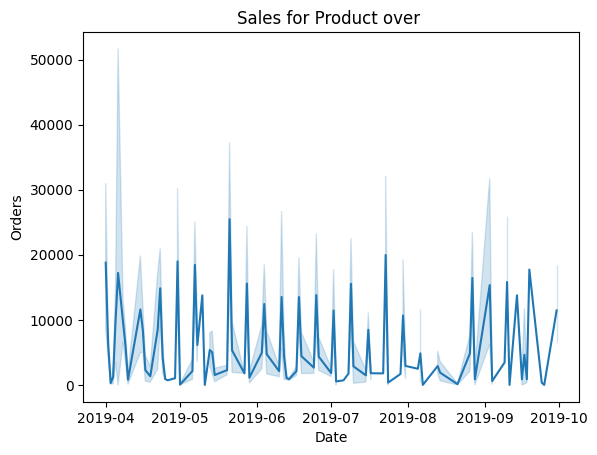

In [ ]:
plot = sn.lineplot(x='Date', y='Orders', data=df_plot)
_ = plot.set(title='Sales for Product over ')

Modelling

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts_decomp_df = df_plot
ts_decomp_df['Orders'] = ts_decomp_df['Orders'].astype(float)
ts_decomp_df.head()

,Material,Orders,year,month,date,weekday
Date,,,,,,
2019-04-01,MAFD0120LIM01PR,2836.90,2019,4,1,7
2019-04-01,MAFD0120LIM01PR,1720.96,2019,4,1,7
2019-04-01,MAFD0120LIM01PR,17209.51,2019,4,1,7
2019-04-01,MAFD0120LIM01PR,1063.84,2019,4,1,7
2019-04-01,MAFD0120LIM01PR,103257.11,2019,4,1,7


<Figure size 640x480 with 0 Axes>

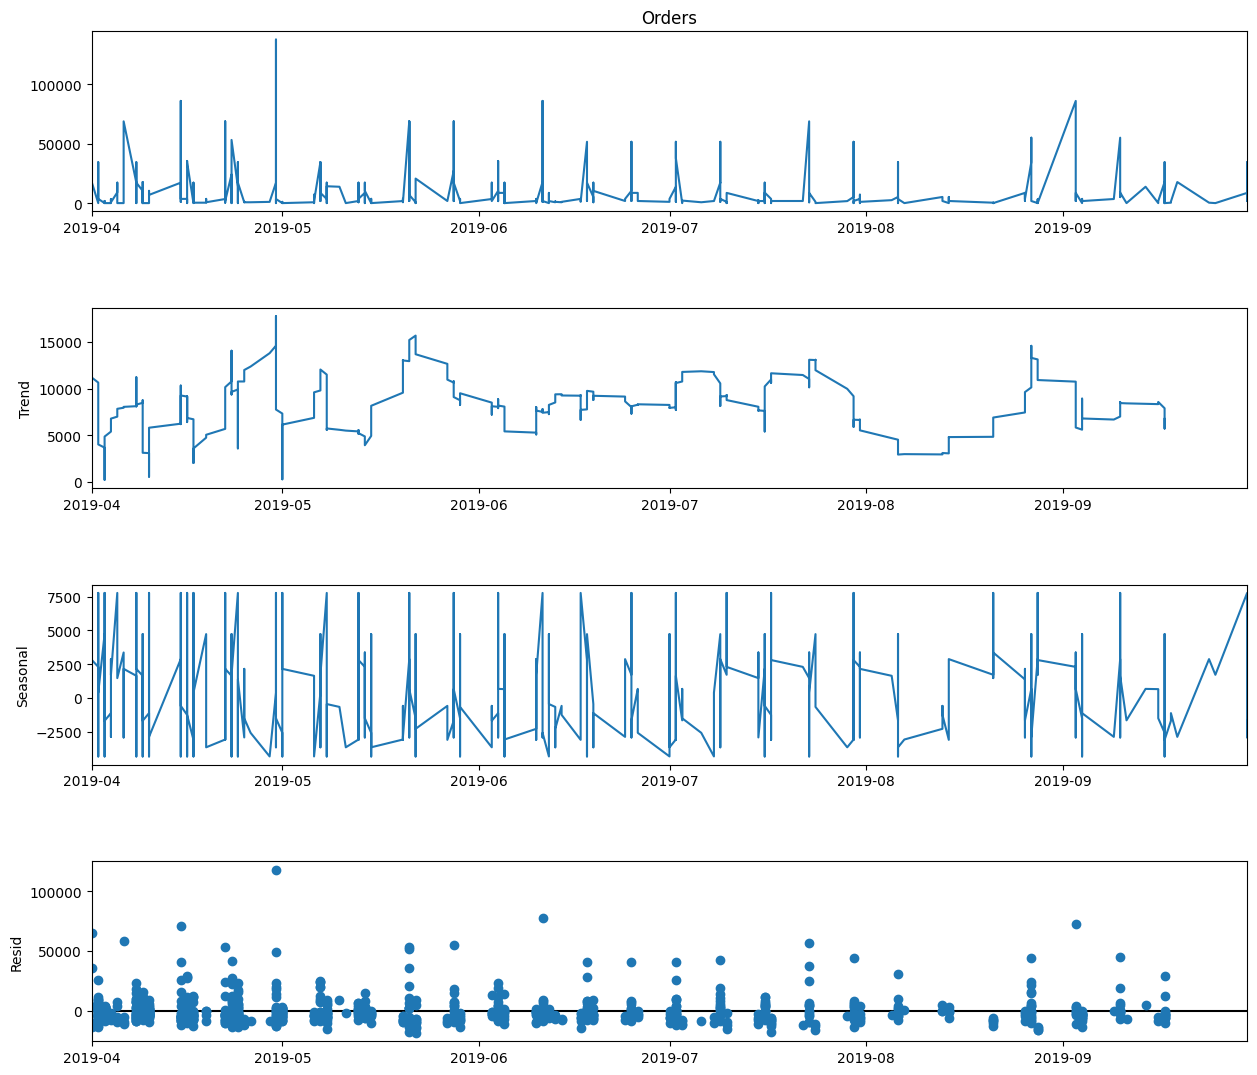

In [ ]:
result = seasonal_decompose(ts_decomp_df['Orders'], model='additive', period = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(14, 12)

Linear Regression Model to predict the sales for October to December

In [ ]:
reg_df = new_df
reg_df

,Date,Material,Orders,year,month,date,weekday
0,2019-04-01,MAFD0120LIM01PR,2836.90,2019,4,1,7
20,2019-04-01,MAFD0120LIM01PR,1720.96,2019,4,1,7
19,2019-04-01,MAFD0120LIM01PR,17209.51,2019,4,1,7
18,2019-04-01,MAFD0120LIM01PR,1063.84,2019,4,1,7
17,2019-04-01,MAFD0120LIM01PR,103257.11,2019,4,1,7
...,...,...,...,...,...,...,...
1090,2019-12-31,MAFD0120LIM01PR,7092.25,2019,12,31,1
1089,2019-12-31,MAFD0120LIM01PR,0.00,2019,12,31,1
1088,2019-12-31,MAFD0120LIM01PR,3546.12,2019,12,31,1
1091,2019-12-31,MAFD0120LIM01PR,709.22,2019,12,31,1


In [ ]:
# Lag features
for i in range(3):
    lag_i = 'lag_' + str(i)
    reg_df[lag_i] = reg_df.Orders.shift(i)

# Rolling window
reg_df['rolling_mean'] = reg_df.Orders.rolling(window=7).mean()
reg_df['rolling_max'] = reg_df.Orders.rolling(window=7).max()
reg_df['rolling_min'] = reg_df.Orders.rolling(window=7).min()

reg_df = reg_df.dropna(how='any', inplace=False)
reg_df = reg_df.drop(['Material'], axis=1)

# Split the series to predict the last 3 months of 2017
reg_df = reg_df.set_index('Date')
reg_train_df = reg_df.loc[:'2019-09-30']
reg_test_df = reg_df.loc['2019-09-30':]

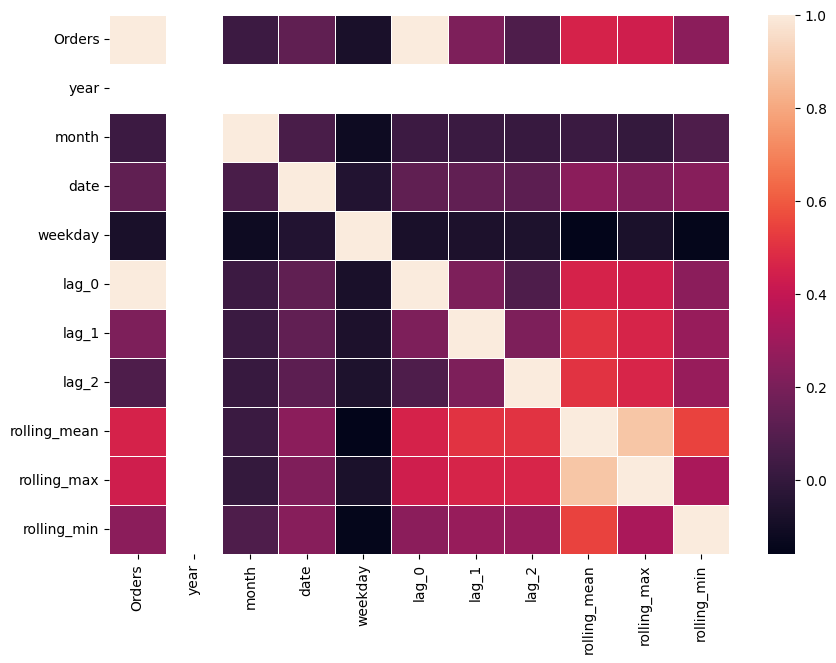

In [ ]:
corr = reg_train_df.corr()
fig = plt.figure(figsize=(10,7))
_ = sn.heatmap(corr, linewidths=.5)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
X_train = reg_train_df.drop(['Orders'], axis=1)
y_train = reg_train_df['Orders'].values

X_test = reg_test_df.drop(['Orders'], axis=1)
y_test = reg_test_df['Orders'].values

#Univariate SelectKBest class to extract top 5 best features
top_features = SelectKBest(score_func=f_regression, k=5)
fit = top_features.fit(X_train, y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

#concat two dataframes for better visualization
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature','Score']  # naming the dataframe columns
print(feature_scores.nlargest(5,'Score'))  # print 5 best features


        Feature       Score
7  rolling_mean  234.505891
8   rolling_max  212.167947
9   rolling_min   58.652669
5         lag_1   40.608445
2          date   15.383090


In [ ]:
X_train = X_train[['lag_0', 'rolling_mean', 'rolling_max', 'weekday', 'month']]
X_test = X_test[['lag_0', 'rolling_mean', 'rolling_max', 'weekday','month']]

# fit model
model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

errors_df = reg_test_df[['Orders']]
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
errors_df.insert(0, 'model', 'LinearRegression')

In [ ]:
def mae(err):
    return np.mean(np.abs(err))

def rmse(err):
    return np.sqrt(np.mean(err ** 2))

def mape(err, sales=errors_df['Orders']):
    return np.sum(np.abs(err))/np.sum(sales) * 100

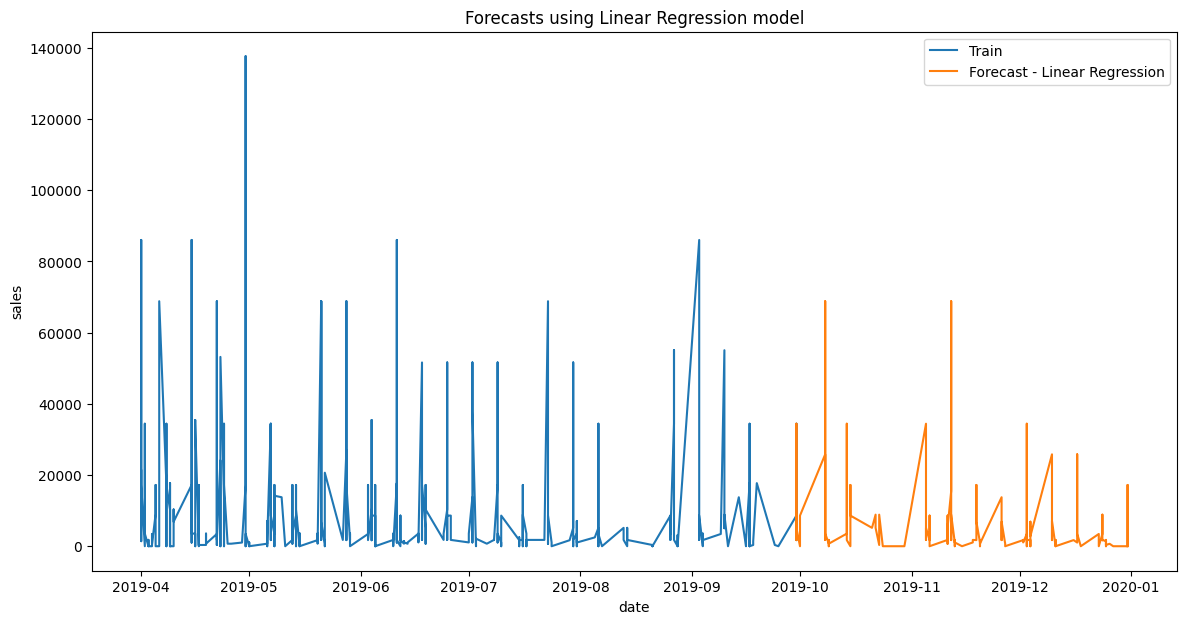

,total_pred_sales,LR_overall_error,MAE,RMSE,MAPE
model,,,,,
LinearRegression,1121050.5,-2.143382e-10,2.050355e-12,2.703293e-12,3.822524e-14


In [ ]:
fig = plt.figure(figsize=(14,7))
plt.plot(reg_train_df.index, reg_train_df['Orders'], label='Train')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Linear Regression model')
plt.show()


result_df_lr = errors_df.groupby('model').agg(total_pred_sales=('pred_sales', 'sum'),
                                          LR_overall_error=('errors', 'sum'),
                                          MAE=('errors', mae),
                                          RMSE=('errors', rmse),
                                          MAPE=('errors', mape))
result_df_lr